<a href="https://colab.research.google.com/github/BartoszJanJerzy/M-L-Bootcamp-cz.1/blob/master/11_k_naj_s%C4%85siad%C3%B3w.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

np.random.seed(42)
sns.set(font_scale=1.3)

##Wczytanie danych

In [6]:
from sklearn.datasets import load_iris

raw_data = load_iris() #dane są w postaci słownika
raw_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']

In [8]:
df = pd.DataFrame(data=np.c_[data, target], columns=all_data['feature_names'] + ['class'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
class,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [11]:
df['class'].value_counts()

2.0    50
1.0    50
0.0    50
Name: class, dtype: int64

##Wizualizacja danych

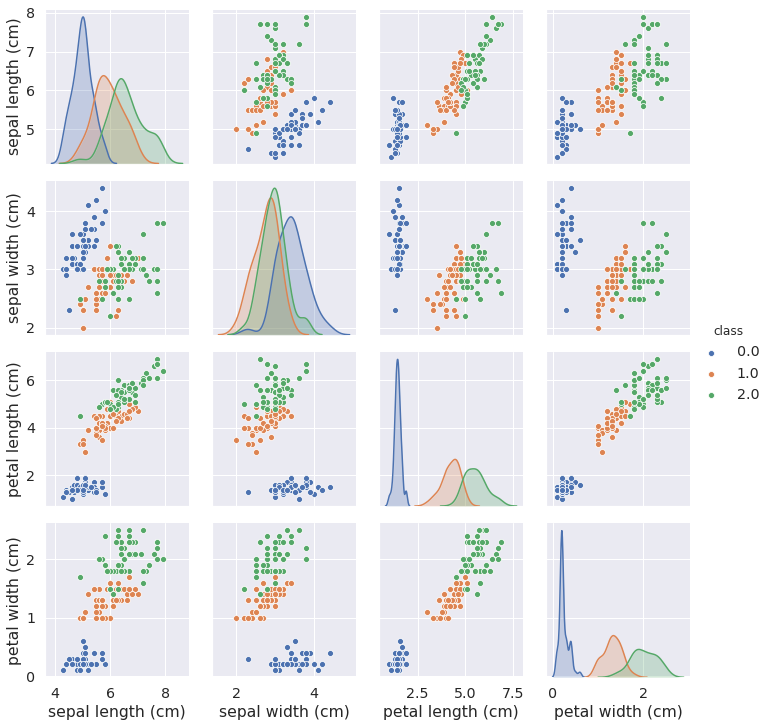

In [12]:
_ = sns.pairplot(df, vars=all_data['feature_names'], hue='class')

In [14]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
class,0.782561,-0.426658,0.949035,0.956547,1.000000


##Przygotowanie danych
na potrzeby tego ćwiczenia wybór dwóch cech sepal_width i sepal_length

In [15]:
data = data[:, :2]

print('data shape:', data.shape)
print('target shape: ', target.shape)

data shape: (150, 2)
target shape:  (150,)


Wizualizacja

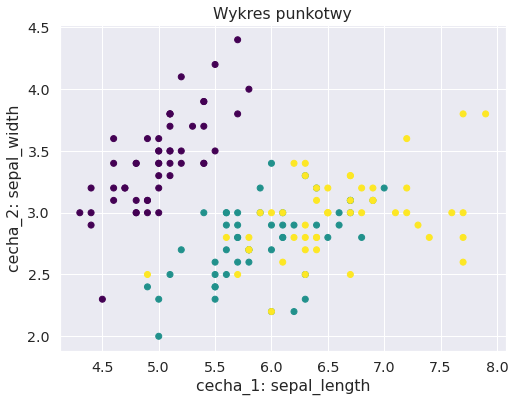

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(data[:, 0], data[:, 1], c=target, cmap='viridis')
plt.title('Wykres punkotwy')
plt.xlabel('cecha_1: sepal_length')
plt.ylabel('cecha_2: sepal_width')
plt.show()

In [18]:
# a z plotly
df = pd.DataFrame(data=np.c_[data, target], columns=['sepal_length','sepal_width', 'class'])
px.scatter(df, x='sepal_length', y='sepal_width', color='class', width=800)

##Tworzenie modelu
/na potrzeby ćwiczenia bez dzielenia na zbiory treningowe i testowe

In [20]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(data,target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Wizualizacja modelu

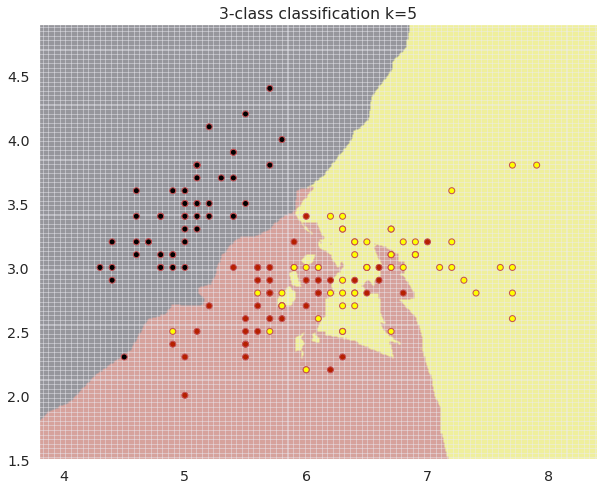

In [23]:
# granice wykresu +/- 0.5 dla czytelności
x_min, x_max = data[:, 0].min() - 0.5, data[:, 0].max() + 0.5
y_min, y_max = data[:, 1].min() - 0.5, data[:, 1].max() + 0.5

# tworzenie siatki do predykcji
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
mesh = np.c_[xx.ravel(), yy.ravel()]
Z = classifier.predict(mesh)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,8))
plt.pcolormesh(xx,yy,Z, cmap='gnuplot', alpha=0.1)
plt.scatter(data[:,0], data[:, 1], c=target, cmap='gnuplot', edgecolors='r')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(),yy.max())
plt.title('3-class classification k=5')
plt.show()

Automatyzacja

In [27]:
def plot_decision_boundries(n_neighbors=1):
  # tworzenei modelu
  classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
  classifier.fit(data,target)
  
  # granice wykresu +/- 0.5 dla czytelności
  x_min, x_max = data[:, 0].min() - 0.5, data[:, 0].max() + 0.5
  y_min, y_max = data[:, 1].min() - 0.5, data[:, 1].max() + 0.5

  # tworzenie siatki do predykcji
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
  mesh = np.c_[xx.ravel(), yy.ravel()]
  Z = classifier.predict(mesh)
  Z = Z.reshape(xx.shape)

  plt.figure(figsize=(10,8))
  plt.pcolormesh(xx,yy,Z, cmap='gnuplot', alpha=0.1)
  plt.scatter(data[:,0], data[:, 1], c=target, cmap='gnuplot', edgecolors='r')
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(),yy.max())
  plt.title(f'3-class classification k={n_neighbors}')
  plt.show()

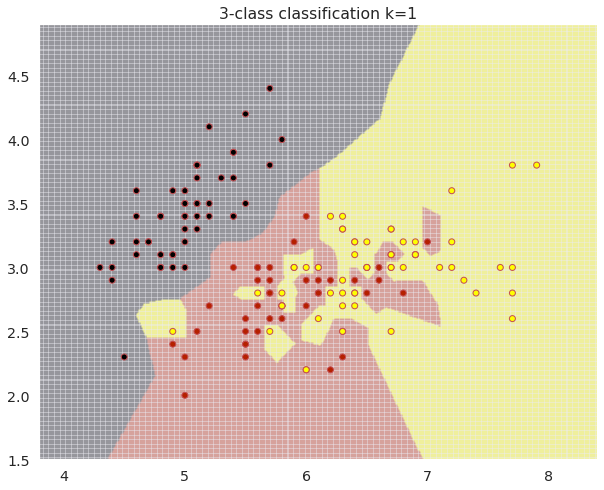

In [32]:
plot_decision_boundries()

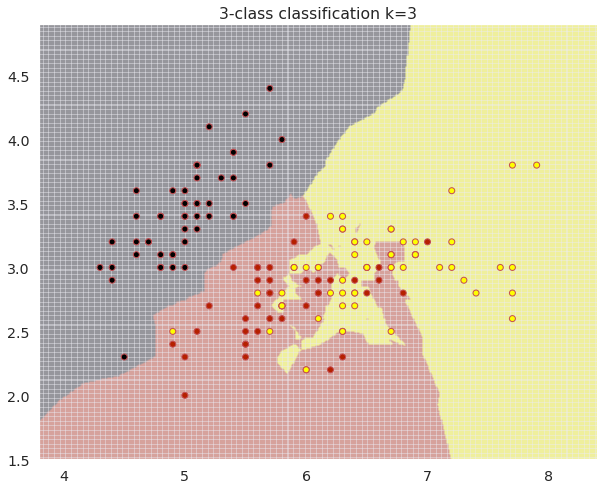

In [30]:
plot_decision_boundries(3)

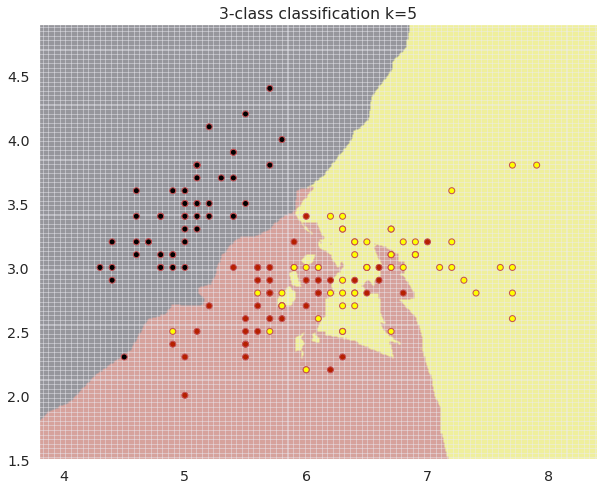

In [31]:
plot_decision_boundries(5)

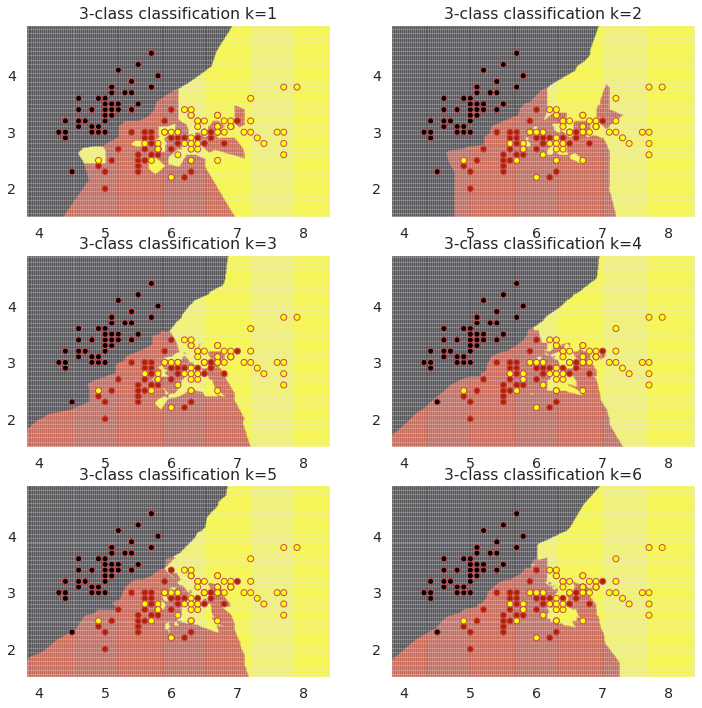

In [36]:
plt.figure(figsize=(12,12))

for i in range(1,7):
  plt.subplot(3, 2, i)

  # tworzenei modelu
  classifier = KNeighborsClassifier(n_neighbors=i)
  classifier.fit(data,target)

  # tworzenie siatki do predykcji
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
  mesh = np.c_[xx.ravel(), yy.ravel()]
  Z = classifier.predict(mesh)
  Z = Z.reshape(xx.shape)

  plt.pcolormesh(xx,yy,Z, cmap='gnuplot', alpha=0.1)
  plt.scatter(data[:,0], data[:, 1], c=target, cmap='gnuplot', edgecolors='r')
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(),yy.max())
  plt.title(f'3-class classification k={i}')

plt.show()